In [1]:
import numpy as np
import cv2
import os

In [2]:
image = cv2.imread("peppers512warna.bmp") 
image2= cv2.imread("Lena512warna.bmp")

In [3]:
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 85, 106, 147],
        [ 60,  99, 166],
        ...,
        [135, 175, 157],
        [183, 207, 196],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 87, 110, 148],
        [ 64,  99, 165],
        ...,
        [134, 174, 158],
        [189, 213, 202],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [100, 120, 126],
        [ 94, 132, 142],
        ...,
        [187, 197, 184],
        [236, 243, 235],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 94, 113, 123],
        [ 79, 115, 131],
        ...,
        [179, 193, 179],
        [226, 234, 227],
        [  0,   0,   0]],

       [[  0,   0,   4],
        [  0,   1,   1],
        [  0,   4,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [4]:
image2

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [5]:
image.shape
image2.shape

(512, 512, 3)

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blue_channel = image[:,:,2]
green_channel = image[:,:,1]
red_channel = image[:,:,0]

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

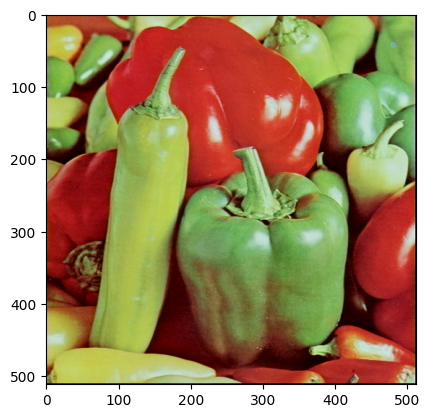

In [8]:
plt.imshow(image)

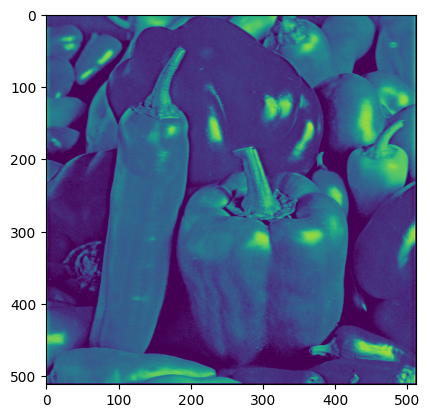

In [9]:
plt.imshow(blue_channel)

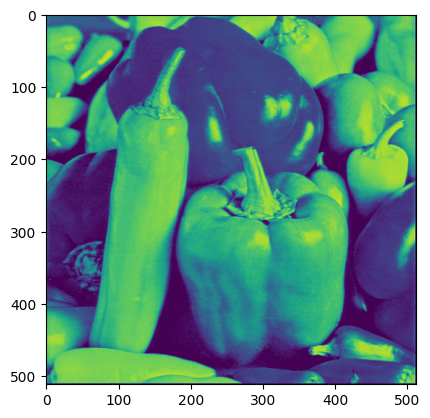

In [10]:
plt.imshow(green_channel)


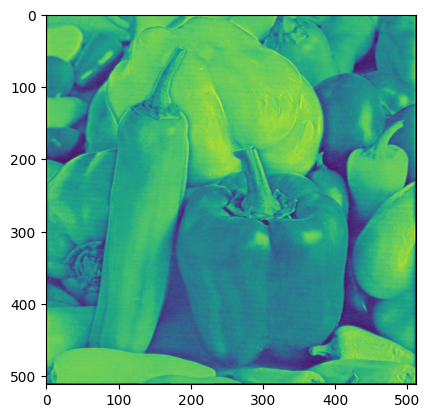

In [11]:
plt.imshow(red_channel)

In [12]:
def RGB2GRAY1(image):
    new_image = np.zeros((image.shape[1], image.shape[0]))
    
    for j in range(new_image.shape[1]):
        for i in range(new_image.shape[0]):
            new_image[j, i] = (image[j,i,0] + image[j,i,1] + image[j,i,2]) / 3
    
    new_image = new_image.astype("uint8")
    return new_image

In [13]:
def RGB2GRAY2(image):
    new_image = np.zeros((image.shape[1], image.shape[0]))
    
    for j in range(new_image.shape[1]):
        for i in range(new_image.shape[0]):
            new_image[j, i] = (0.299 * image[j,i,0]) + (0.587 * image[j,i,1]) + (0.144  * image[j,i,2])
    
    new_image = new_image.astype("uint8")
    return new_image

In [14]:
new_image = RGB2GRAY1(image)

C:\Users\USER\AppData\Local\Temp\ipykernel_23136\866613382.py:6: RuntimeWarning: overflow encountered in scalar add
  new_image[j, i] = (image[j,i,0] + image[j,i,1] + image[j,i,2]) / 3


In [15]:
new_image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 27, 23, ..., 70, 24,  0],
       [ 0, 29, 24, ..., 70, 30,  0],
       ...,
       [ 0, 30, 37, ..., 18, 67,  0],
       [ 0, 24, 23, ..., 13, 58,  0],
       [ 1,  0,  1, ...,  0,  0,  0]], dtype=uint8)

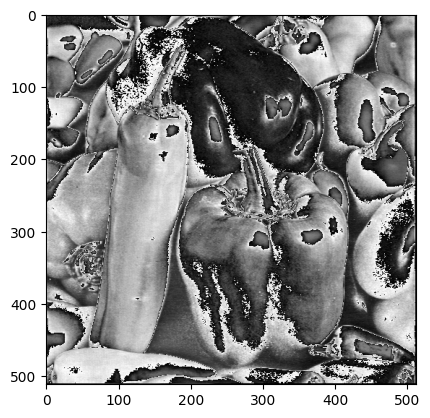

In [16]:
plt.imshow(new_image, cmap = "gray")

In [17]:
new_image2 = RGB2GRAY2(image)
gray_image = RGB2GRAY2(image2)

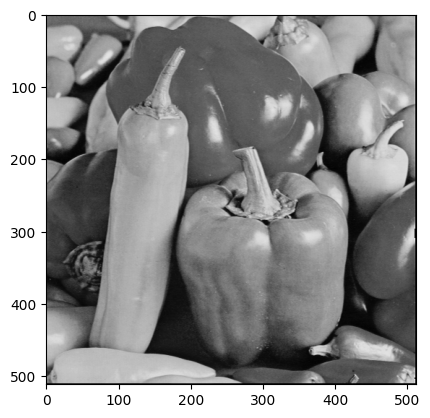

In [18]:
plt.imshow(new_image2, cmap = "gray")

In [19]:
# Fungsi Biner
def biner(image, T):
    M, N = image.shape
    biner_image = np.zeros((M, N), dtype=np.uint8)
    for i in range(M):
        for j in range(N):
            if image[i, j] < T:
                biner_image[i, j] = 0
            else:
                biner_image[i, j] = 255
    return biner_image

In [20]:
binary_image = biner(new_image2, 128)

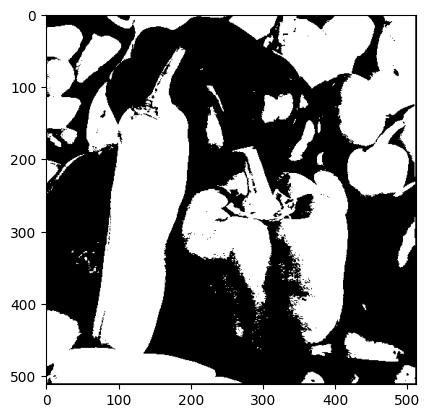

In [21]:
plt.imshow(binary_image, cmap='gray')

In [22]:
# Fungsi Negatif
def negatif(image):
    M, N = image.shape
    B = np.zeros_like(image)
    
    for i in range(M):
        for j in range(N):
            B[i, j] = 255 - image[i, j]
    return B

In [23]:
negative_image = negatif(new_image2)

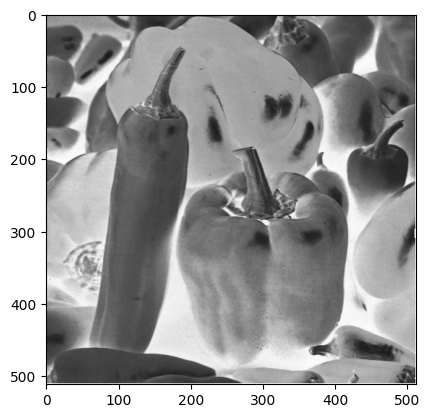

In [24]:
plt.imshow(negative_image, cmap='gray')

In [25]:
# Fungsi Image Brightening
def image_brightening(image, b):
    M, N, C = image.shape  # M = baris, N = kolom, C = channel (3 untuk RGB)
    B = np.zeros_like(image)  # Output image
    
    for i in range(M):
        for j in range(N):
            for k in range(C):  # Loop untuk setiap channel (R, G, B)
                temp = image[i, j, k] + b
                # Clipping nilai ke rentang 0-255
                if temp < 0:
                    B[i, j, k] = 0
                elif temp > 255:
                    B[i, j, k] = 255
                else:
                    B[i, j, k] = temp
    return B

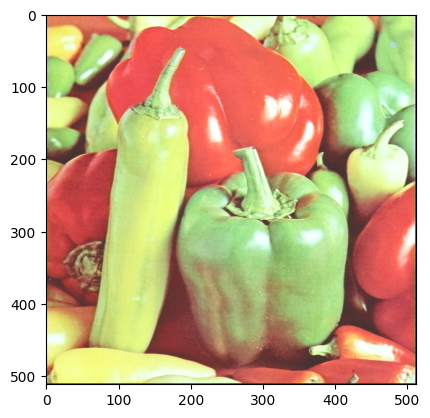

In [26]:
# Fungsi Image Brightening versi clipping
def image_brightening(image, b):
    return np.clip(image.astype(int) + b, 0, 255).astype(np.uint8)

# Contoh penggunaan
brightened_image = image_brightening(image, 50)  # Tambahkan 25 ke setiap channel
plt.imshow(brightened_image)

In [27]:
# Fungsi Addition (Penjumlahan dua citra)
def addition(A, B):
    M, N = A.shape
    C = np.zeros((M, N), dtype=np.uint8)
    for i in range(M):
        for j in range(N):
             temp = int(A[i, j]) + int(B[i, j])
             C[i, j] = min(temp, 255)  # Clipping pada 255
    return C

In [28]:
added_image = addition(new_image2, gray_image)

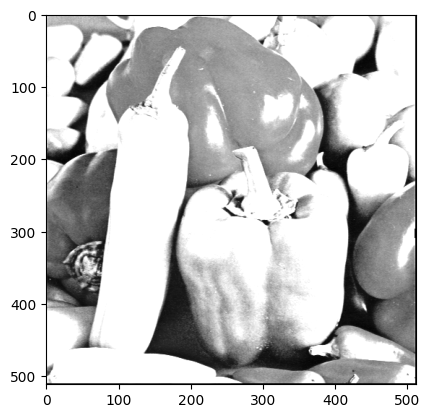

In [29]:
plt.imshow(added_image, cmap='gray')

In [30]:
# Fungsi Substraction (Pengurangan dua citra)
def substraction(A, B):
    M, N = A.shape
    C = np.zeros((M, N), dtype=np.uint8)
    for i in range(M):
        for j in range(N):
            diff = int(A[i, j]) - int(B[i, j])
            C[i, j] = 255 if diff != 0 else 0  # Highlight perbedaan
    return C

In [31]:
subtracted_image = substraction(new_image2, gray_image)  

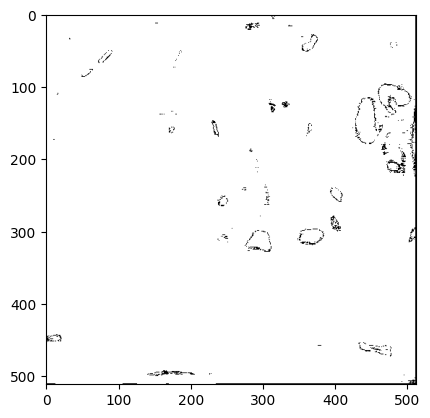

In [32]:
plt.imshow(subtracted_image, cmap='gray')

In [33]:
# Fungsi Multiplication (Perkalian dua citra)
def multiplication(A, B):
    M, N = A.shape
    C = np.zeros((M, N), dtype=np.uint8)
    for i in range(M):
        for j in range(N):
           temp = int(A[i, j]) * int(B[i, j])
           C[i, j] = min(max(temp, 0), 255)  # Clipping pada 0 dan 255
    return C

In [34]:
multiplied_image = multiplication(new_image2, gray_image)

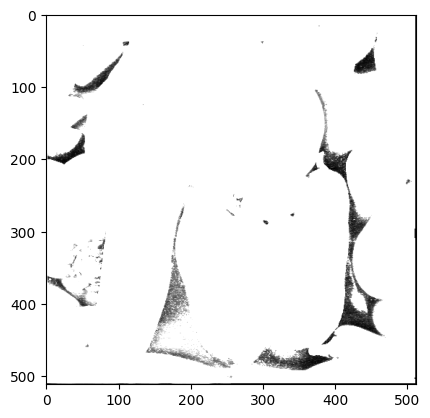

In [35]:
plt.imshow(multiplied_image, cmap='gray')

In [36]:
# Fungsi Not (Komplemen citra biner)
def binary_not(binary_image):
   return 255 - binary_image

In [37]:
not_image = binary_not(binary_image)
# Agar tampak dengan skala 0-255:
not_image_display = not_image * 255

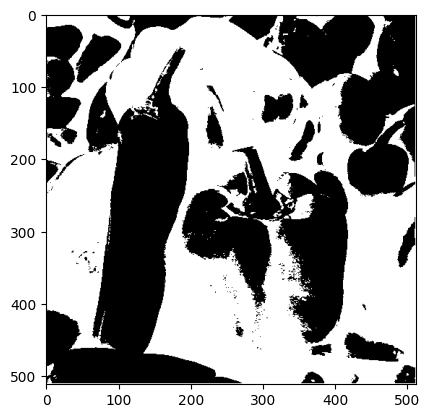

In [38]:
plt.imshow(not_image_display, cmap='gray')

In [39]:
# Fungsi Translation (Translasi citra)
def translation(image, m, n):
    M, N = image.shape[:2]
    translated_image = np.zeros_like(image)
    for i in range(M):
        for j in range(N):
            if 0 <= i+m < M and 0 <= j+n < N:
                translated_image[i, j] = image[i+m, j+n]
    return translated_image

In [40]:
# Translasi: Misal geser citra ke atas dan ke kiri sebanyak 10 piksel
translated_image = translation(image, 100, 100)

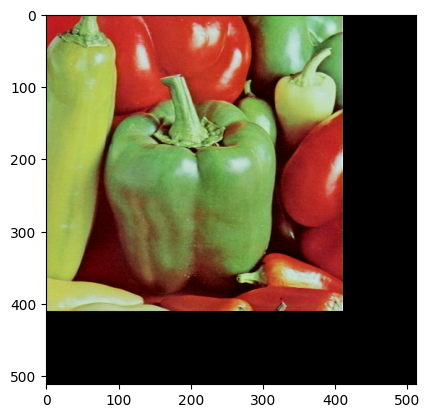

In [41]:
plt.imshow(translated_image, cmap='gray')

In [42]:
# Fungsi Rotation 90° Counter-Clockwise (Rotasi 90° berlawanan arah jarum jam)
def rotation90CCW(image):
    return np.rot90(image, k=1)

In [43]:
rotated_ccw = rotation90CCW(image)

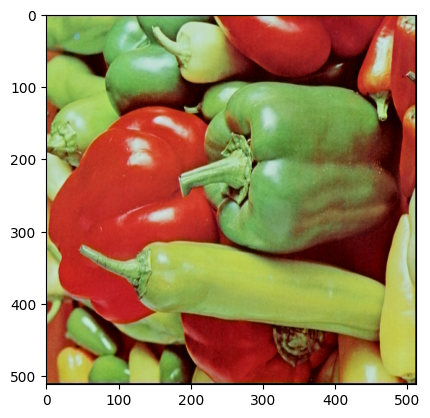

In [44]:
plt.imshow(rotated_ccw, cmap='gray')

In [45]:
# Fungsi Rotation 90° Clockwise (Rotasi 90° searah jarum jam)
def rotation90CW(image):
    return np.rot90(image, k=-1)

In [46]:
rotated_cw = rotation90CW(image)

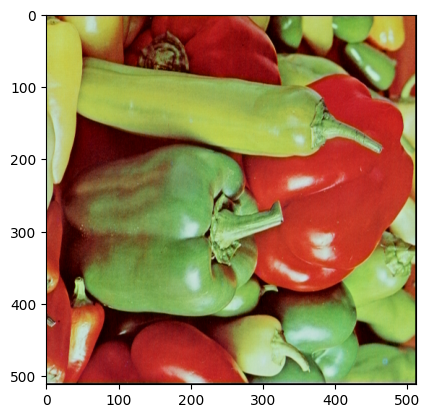

In [47]:
plt.imshow(rotated_cw, cmap='gray')

In [48]:
# Fungsi Vertical Flip (Pencerminan vertikal terhadap sumbu-X)
def vertical_flip(image):
    return np.flipud(image)

In [49]:
vflipped_image = vertical_flip(image)

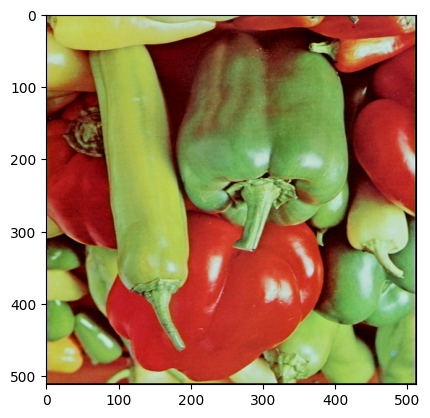

In [50]:
plt.imshow(vflipped_image, cmap='gray')

In [51]:
# Fungsi Zoom Out 
def zoom_out(image):
    M, N = image.shape[:2]
    zoomed_image = np.zeros((2*M, 2*N, 3), dtype=np.uint8)
    for i in range(M):
        for j in range(N):
            zoomed_image[2*i:2*(i+1), 2*j:2*(j+1)] = image[i, j]
    return zoomed_image

In [52]:
# Zoom Out (Perbesaran 2x)
zoomed_image = zoom_out(image)

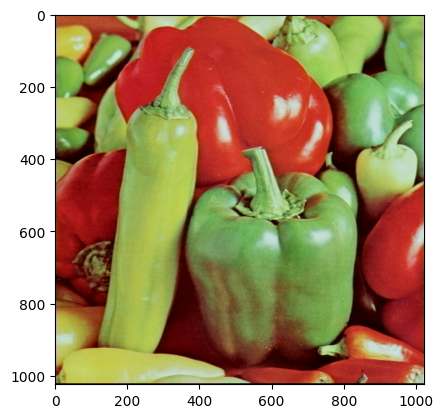

In [53]:
plt.imshow(zoomed_image, cmap='gray')